<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/alicenkbaytop/abalone-dataset/data">Jeu de données Ormeau(Abalone)<br>Analyse exploratoire des données</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/abalone.jpg" width="96"></th>
 </tr>
<tr>                                                                                   
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/abalone01.jpg" width="512"></th>
 </tr>    
</table>


<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/1/abalone">Veuillez vous référer à la page UC Irvine Machine Learning Repository officielle pour plus de détails.</a></div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go
# import graphviz, pydotplus
from IPython.display import Image
import re

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier,export_graphviz

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

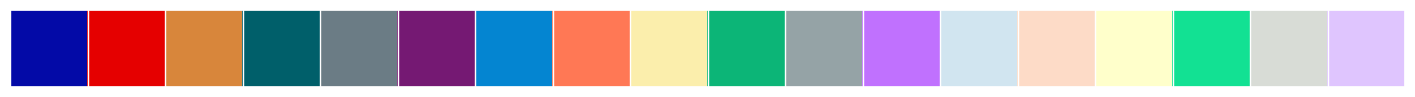

In [3]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [4]:
repertoireRacine  = '.'
nomProjet         = "Abalone-Analyse exploratoire des données"

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

In [5]:
def formatPct(pct, allvals):
    total = int(round(pct/100. * np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, total)   

In [6]:
def affichageDistribution(colonne,couleur,ax, nom=''):
    graph = sns.distplot(colonne, color=couleur, ax=ax)
    graph.set(ylabel=None)
    moyenne, mediane = float(colonne.mean()), \
                   float(colonne.median())
    
    ax.axvline(moyenne, color='g', linestyle='-', label=f"{nom:12s} mean   = {moyenne:0.4f}", lw=2)
    ax.axvline(mediane, color='b', linestyle='--', label=f"{nom:12s} median = {mediane:0.4f}", lw=2)
    graph.legend(loc="upper right")

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>

<table>
    <tr> 
        <th  style="text-align:left">
            <table>
                <CAPTION style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>Iris.csv</CAPTION>    
            <tr>                                                                                   
                <tr>                                                                                   
                     <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
                     <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Sex</th>
                    <th  style="text-align:left">M, F et I (nourrisson)</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Longueur(mm)</th>
                    <th  style="text-align:left">mesure de la coquille la plus longue</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Diametre(mm)</th>
                    <th  style="text-align:left">perpendiculaire à la longueur</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Hauteur(mm)</th>
                    <th  style="text-align:left">avec la chair dans la coquille</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Poids.Entier(grammes)</th>
                    <th  style="text-align:left">poids du ormeau entier</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Poids.Decortique(grammes)</th>
                    <th  style="text-align:left">poids de la chair</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Poids.Visceres(grammes)</th>
                    <th  style="text-align:left">poids des intestins (après saignée)</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Poids.Coquille(grammes)</th>
                    <th  style="text-align:left">poids coquille après séchage</th>
                </tr>
                <tr>
                    <th  style="text-align:left;color:red;">Anneaux</th>
                    <th  style="text-align:left;color:red;">+1,5 donne l'âge en années</th>
                </tr>
            </table>
        </th>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/abalone01.jpg" width="512"></th>
    </tr>
</table>


In [7]:
donnees = pd.read_csv("../../donnees/Abalone/abalone.csv").iloc[:,1:]
donnees.sample(5)

,Sex,Longueur,Diametre,Hauteur,Poids.Entier,Poids.Decortique,Poids.Visceres,Poids.Coquille,Anneaux
280,I,0.360,0.285,0.105,0.2415,0.0915,0.0570,0.0750,7
1433,I,0.375,0.280,0.085,0.3155,0.1870,0.0460,0.0670,7
2770,F,0.575,0.435,0.155,0.8975,0.4115,0.2325,0.2300,9
3018,I,0.450,0.330,0.115,0.3650,0.1400,0.0825,0.1245,8
1141,M,0.575,0.445,0.170,1.0225,0.5490,0.2175,0.2280,9


In [8]:
donnees.set_index(['Sex'], inplace=True)

In [9]:
donnees.dtypes

Longueur            float64
Diametre            float64
Hauteur             float64
Poids.Entier        float64
Poids.Decortique    float64
Poids.Visceres      float64
Poids.Coquille      float64
Anneaux               int64
dtype: object

In [10]:
import sys
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score 
sys.path.append(os.path.abspath('../../outils/'))
from prjFormation import palette
from prjClustering import afficheKMeansClusters, affichageClusters,\
                          affichageChoixNombreClusters, retrouveDFCluster, \
                          afficheGraphiqueSilhouettes, affichageClusters, \
                          afficheSilhouettesClusters, afficheSilhouettesClustersH, afficheSilhouettesClustersV, \
                          bic_score, executionKMeans

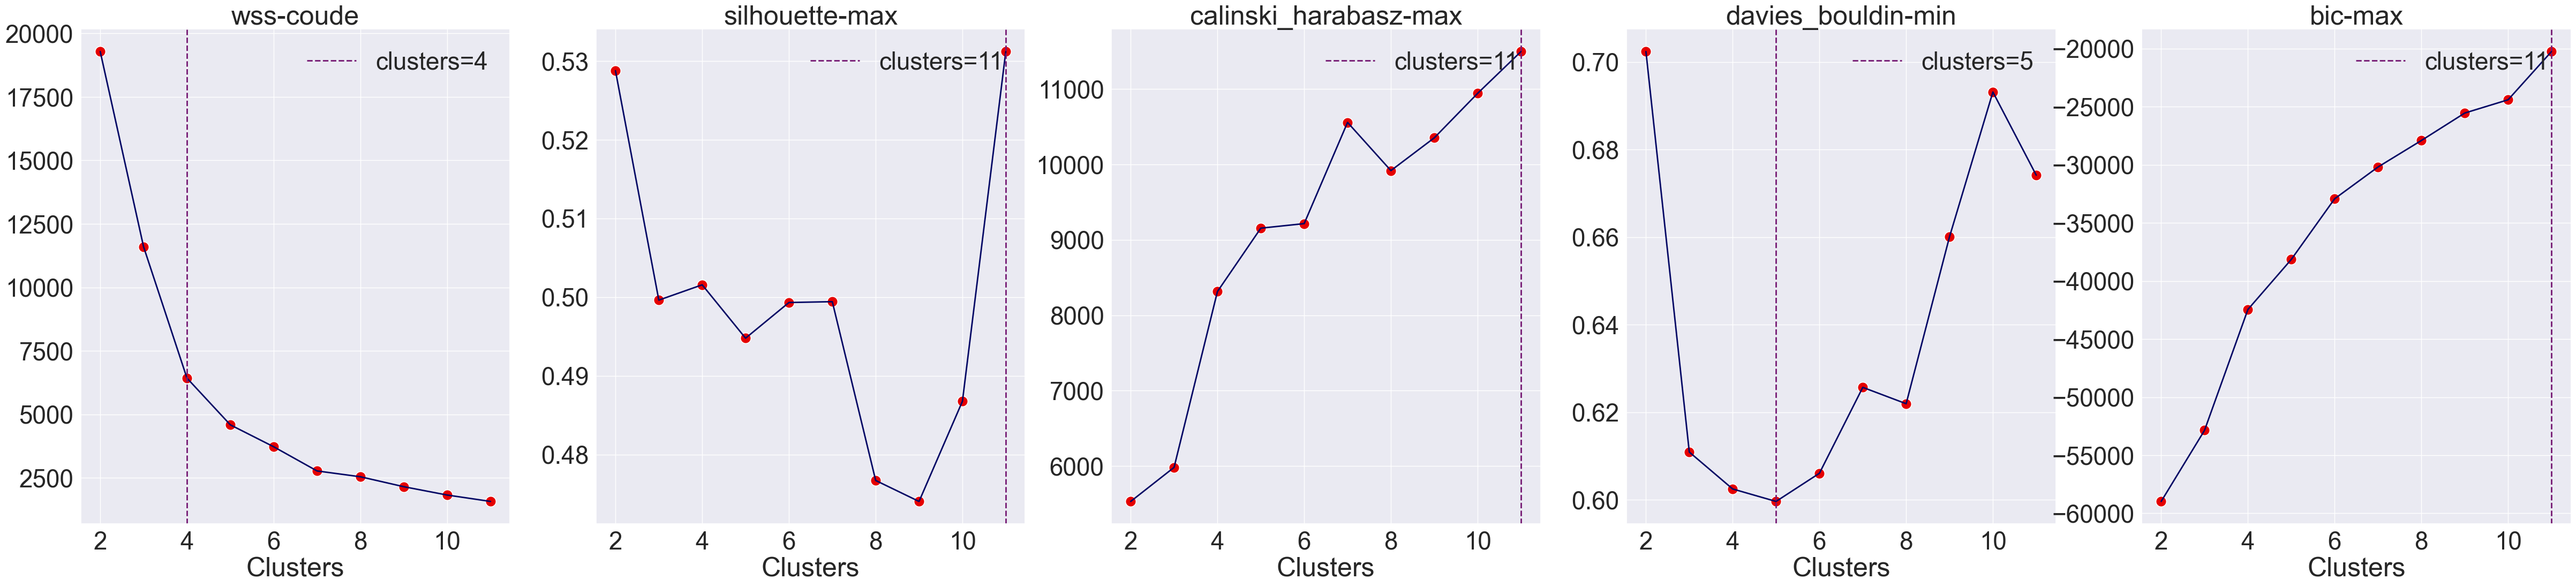

In [11]:
infoKMeans = executionKMeans(donnees, listeClusters=[i for i in range(2,12)])
affichageChoixNombreClusters(infoKMeans, tailleImage=12)

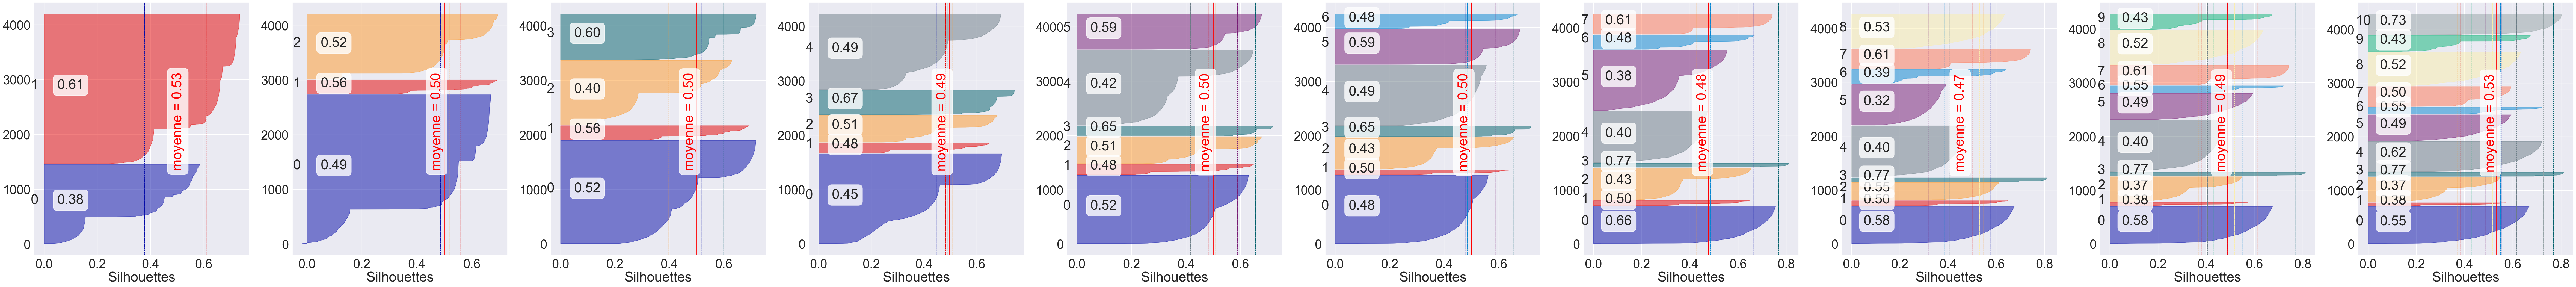

In [12]:
afficheSilhouettesClusters(donnees, infoKMeans, tailleImage=12)